In [1]:
import TM_vtm_data as vtm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.pyplot import figure, draw, pause

In [2]:
data = vtm.VTK_data()

In [3]:
data.load_data()

loading data
Data Loaded
	# of geometries: 1000
	# of results: 1000


In [4]:
test_geometries = np.stack(data.geometries, axis=0)
test_results = np.stack(data.results, axis=0)

<IPython.core.display.Javascript object>


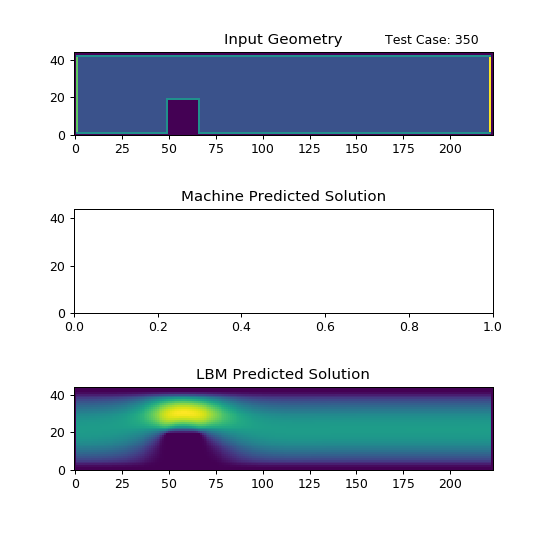

In [21]:
%matplotlib notebook
fig, axs = plt.subplots(3, figsize=(6,6))
fig.tight_layout(pad=3.0)

axs[0].axes.set_title('Input Geometry')
axs[1].axes.set_title('Machine Predicted Solution')
axs[2].axes.set_title('LBM Predicted Solution')

ims = []
for i in range(0,test_geometries.shape[0]-1):
    geom = axs[0].imshow(test_geometries[i,:,:,0], animated=True)
    predicted = geom #axs[1].imshow( predicted_steady_flow[i,:,:,0], animated=True)
    LBM = axs[2].imshow( test_results[i,:,:,0], animated=True)
    
    an = axs[0].annotate(f'Test Case: {i}', xy=(165,48),annotation_clip=False)
    
    ims.append([geom, predicted, LBM, an])
    for i in range(0,len(axs)):
        axs[i].set_ylim(ymin=0,ymax=test_geometries.shape[1])

ani = animation.ArtistAnimation(fig, ims, interval=250, blit=True,
                                repeat_delay=100)

#ani.save('Predictions.mp4')

plt.show()

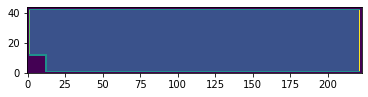

In [12]:
f, ax = plt.subplots(1)
ax.imshow(test_geometries[2,:,:,0])
ax.set_ylim(ymin=0,ymax=test_geometries.shape[1])
plt.show()